***Deep learning***

In [5]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

In [6]:
img_width, img_height=192,192
input_shape=(img_height,img_width)
train_data_dir='/content/drive/MyDrive/Drunk_distraction /imgs/train'
batch_size=48;

In [7]:

#Data augmentation
datagen=ImageDataGenerator(
    rescale=1./244,
    validation_split=0.20,
)
train_generator=datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    subset="training",
    class_mode='categorical'   
)
val_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    subset="validation",
    class_mode='categorical'

)

Found 13975 images belonging to 10 classes.
Found 3487 images belonging to 10 classes.


**VGG16**

In [8]:

model = Sequential()
model.add(Conv2D(input_shape=(192,192,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=10, activation="softmax"))


In [10]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [11]:
from keras.callbacks import History,ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Drunk_distraction /model.h5", monitor='val_acc', verbose=1, save_best_only=True,
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='max',baseline=0.95)
history=History()
model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,callbacks=[history,checkpoint],
    validation_data=validation_generator,
    validation_steps=2   
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
100/100 [==============================] - 1275s 12s/step - loss: 2.2086 - accuracy: 0.1656 - val_loss: 1.6526 - val_accuracy: 0.4375
Epoch 2/50
100/100 [==============================] - 810s 8s/step - loss: 1.4281 - accuracy: 0.4755 - val_loss: 0.9869 - val_accuracy: 0.6250
Epoch 3/50
100/100 [==============================] - 570s 6s/step - loss: 0.7105 - accuracy: 0.7655 - val_loss: 0.6266 - val_accuracy: 0.8125
Epoch 4/50
100/100 [==============================] - 390s 4s/step - loss: 0.3732 - accuracy: 0.8922 - val_loss: 0.2150 - val_accuracy: 0.9479
Epoch 5/50
100/100 [==============================] - 271s 3s/step - loss: 0.2301 - accuracy: 0.9359 - val_loss: 0.2255 - val_accuracy: 0.9583
Epoch 6/50
100/100 [==============================] - 187s 2s/step - loss: 0.1676 - accuracy: 0.9548 - val_loss: 0.1889 - val_accuracy: 0.9479
Epoch 7/50
100/100 [==============================] - 153s 2s/step - loss: 0.1372 - accuracy: 0.9610 - val_loss: 0.1463 - val_accuracy: 0.94

Class: 1


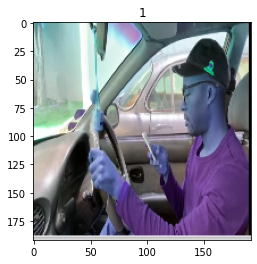

In [28]:
# print(history.history.keys())
import os, cv2
from matplotlib import pyplot as plt
import numpy as np
classes=["c0","c1","c2","c3","c4","c5","c6","c7","c8","c9"]
img=cv2.imread('/content/drive/MyDrive/Drunk_distraction /test_images/image_1.JPG')
dim = (192, 192)
img=cv2.resize(img, dim)
img=np.reshape(img,(-1,192,192,3))
img_class = model.predict(img)
img_class=np.argmax(img_class, axis=1)
prediction = img_class[0]
classname = img_class[0]
img=np.reshape(img,(192,192,3))
print("Class: ",classname)
plt.title(classname)
plt.imshow(img)
plt.show()


Class: 2


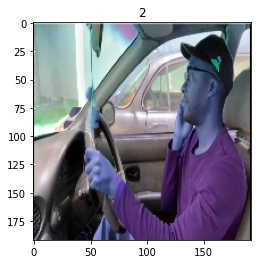

In [27]:
# print(history.history.keys())
import os, cv2
from matplotlib import pyplot as plt
import numpy as np
classes=["c0","c1","c2","c3","c4","c5","c6","c7","c8","c9"]
img=cv2.imread('/content/drive/MyDrive/Drunk_distraction /test_images/image_2.JPG')
dim = (192, 192)
img=cv2.resize(img, dim)
img=np.reshape(img,(-1,192,192,3))
img_class = model.predict(img)
img_class=np.argmax(img_class, axis=1)
prediction = img_class[0]
classname = img_class[0]
img=np.reshape(img,(192,192,3))
print("Class: ",classname)
plt.title(classname)
plt.imshow(img)
plt.show()


Class: 7


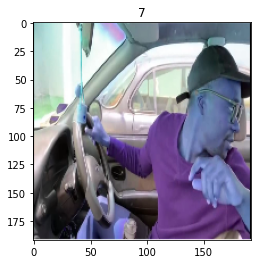

In [26]:
# print(history.history.keys())
import os, cv2
from matplotlib import pyplot as plt
import numpy as np
classes=["c0","c1","c2","c3","c4","c5","c6","c7","c8","c9"]
img=cv2.imread('/content/drive/MyDrive/Drunk_distraction /test_images/image_6.JPG')
dim = (192, 192)
img=cv2.resize(img, dim)
img=np.reshape(img,(-1,192,192,3))
img_class = model.predict(img)
img_class=np.argmax(img_class, axis=1)
prediction = img_class[0]
classname = img_class[0]
img=np.reshape(img,(192,192,3))
print("Class: ",classname)
plt.title(classname)
plt.imshow(img)
plt.show()


Class: 2


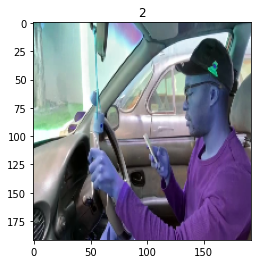

In [29]:
# print(history.history.keys())
import os, cv2
from matplotlib import pyplot as plt
import numpy as np
classes=["c0","c1","c2","c3","c4","c5","c6","c7","c8","c9"]
img=cv2.imread('/content/drive/MyDrive/Drunk_distraction /driver/00069.jpg')
dim = (192, 192)
img=cv2.resize(img, dim)
img=np.reshape(img,(-1,192,192,3))
img_class = model.predict(img)
img_class=np.argmax(img_class, axis=1)
prediction = img_class[0]
classname = img_class[0]
img=np.reshape(img,(192,192,3))
print("Class: ",classname)
plt.title(classname)
plt.imshow(img)
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Class:  7


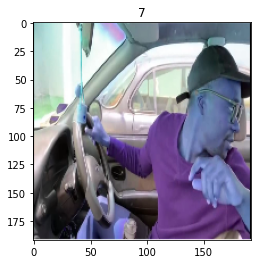

In [35]:
 print(history.history.keys())
import os, cv2
from matplotlib import pyplot as plt
import numpy as np
classes=["c0","c1","c2","c3","c4","c5","c6","c7","c8","c9"]
img=cv2.imread('/content/drive/MyDrive/Drunk_distraction /test_images/image_6.JPG')
dim = (192, 192)
img=cv2.resize(img, dim)
img=np.reshape(img,(-1,192,192,3))
img_class = model.predict(img)
img_class=np.argmax(img_class, axis=1)
prediction = img_class[0]
classname = img_class[0]
img=np.reshape(img,(192,192,3))
print("Class: ",classname)
plt.title(classname)
plt.imshow(img)
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Class:  7


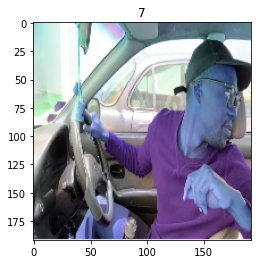

In [37]:

import os, cv2
from matplotlib import pyplot as plt
import numpy as np
classes=["c0","c1","c2","c3","c4","c5","c6","c7","c8","c9"]
img=cv2.imread('/content/drive/MyDrive/Drunk_distraction /test_images/image_7.JPG')
dim = (192, 192)
img=cv2.resize(img, dim)
img=np.reshape(img,(-1,192,192,3))
img_class = model.predict(img)
img_class=np.argmax(img_class, axis=1)
prediction = img_class[0]
classname = img_class[0]
img=np.reshape(img,(192,192,3))
print("Class: ",classname)
plt.title(classname)
plt.imshow(img)
plt.show()

Class: 6


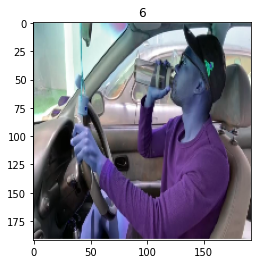

In [40]:

import os, cv2
from matplotlib import pyplot as plt
import numpy as np
classes=["c0","c1","c2","c3","c4","c5","c6","c7","c8","c9"]
img=cv2.imread('/content/drive/MyDrive/Drunk_distraction /test_images/image_5.JPG')
dim = (192, 192)
img=cv2.resize(img, dim)
img=np.reshape(img,(-1,192,192,3))
img_class = model.predict(img)
img_class=np.argmax(img_class, axis=1)
prediction = img_class[0]
classname = img_class[0]
img=np.reshape(img,(192,192,3))
print("Class: ",classname)
plt.title(classname)
plt.imshow(img)
plt.show()

In [ ]:
from keras.callbacks import History,ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("cnn_m.h5", monitor='val_acc', verbose=1, save_best_only=True,
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='max',baseline=0.95)
history=History()
model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=40,callbacks=[history],
    validation_data=validation_generator,
    validation_steps=2   
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/40
200/200 [==============================] - 2070s 10s/step - loss: 1.7804 - accuracy: 0.3414 - val_loss: 0.9557 - val_accuracy: 0.6562
Epoch 2/40
200/200 [==============================] - 681s 3s/step - loss: 0.4851 - accuracy: 0.8520 - val_loss: 0.4117 - val_accuracy: 0.8854
Epoch 3/40
200/200 [==============================] - 281s 1s/step - loss: 0.1953 - accuracy: 0.9448 - val_loss: 0.1699 - val_accuracy: 0.9688
Epoch 4/40
200/200 [==============================] - 215s 1s/step - loss: 0.1109 - accuracy: 0.9695 - val_loss: 0.2050 - val_accuracy: 0.9375
Epoch 5/40
200/200 [==============================] - 215s 1s/step - loss: 0.0768 - accuracy: 0.9772 - val_loss: 0.1092 - val_accuracy: 0.9688
Epoch 6/40
200/200 [==============================] - 211s 1s/step - loss: 0.0540 - accuracy: 0.9851 - val_loss: 0.1140 - val_accuracy: 0.9688
Epoch 7/40
200/200 [==============================] - 212s 1s/step - loss: 0.0452 - accuracy: 0.9869 - val_loss: 0.2653 - val_accuracy: 0.97

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_8254.jpg
(240, 320, 3)
(192, 192, 3)
Class:  6


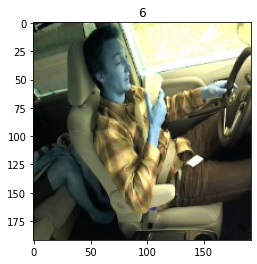

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_65035.jpg
(240, 320, 3)
(192, 192, 3)
Class:  7


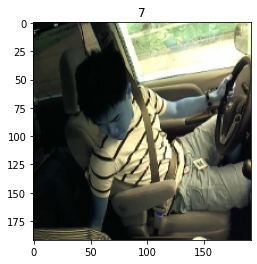

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_80006.jpg
(240, 320, 3)
(192, 192, 3)
Class:  7


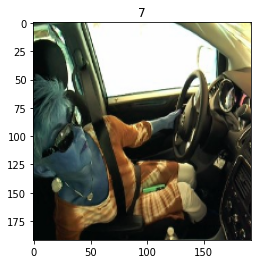

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_70645.jpg
(240, 320, 3)
(192, 192, 3)
Class:  4


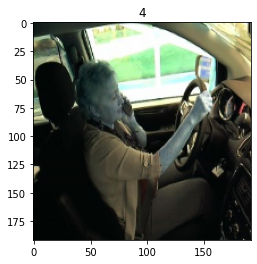

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_7216.jpg
(240, 320, 3)
(192, 192, 3)
Class:  2


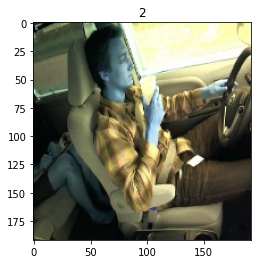

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_69607.jpg
(240, 320, 3)
(192, 192, 3)
Class:  8


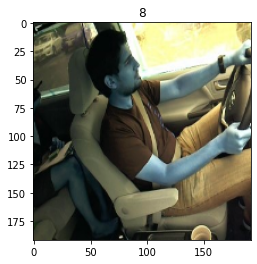

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_72648.jpg
(240, 320, 3)
(192, 192, 3)
Class:  6


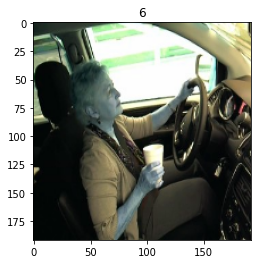

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_67737.jpg
(240, 320, 3)
(192, 192, 3)
Class:  2


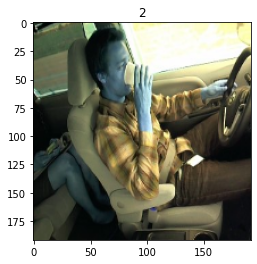

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_67338.jpg
(240, 320, 3)
(192, 192, 3)
Class:  3


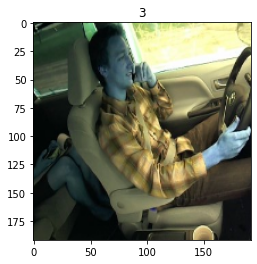

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_69904.jpg
(240, 320, 3)
(192, 192, 3)
Class:  6


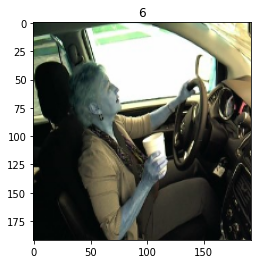

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_79080.jpg
(240, 320, 3)
(192, 192, 3)
Class:  2


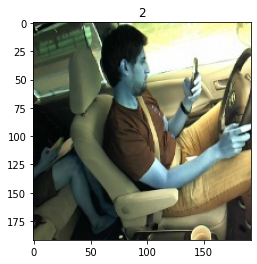

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_72279.jpg
(240, 320, 3)
(192, 192, 3)
Class:  6


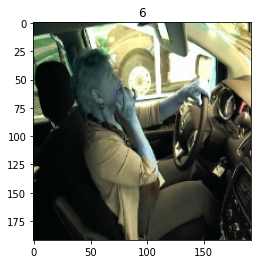

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_70675.jpg
(240, 320, 3)
(192, 192, 3)
Class:  0


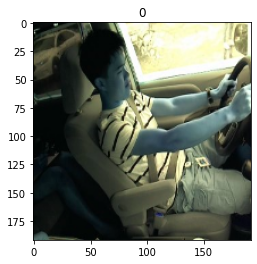

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_68333.jpg
(240, 320, 3)
(192, 192, 3)
Class:  1


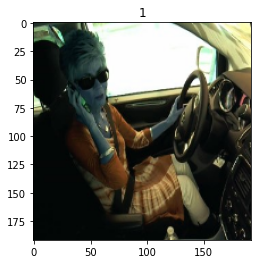

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_72819.jpg
(240, 320, 3)
(192, 192, 3)
Class:  7


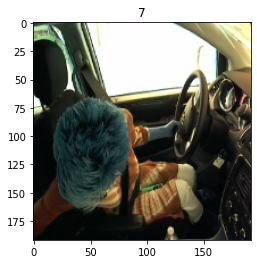

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_68893.jpg
(240, 320, 3)
(192, 192, 3)
Class:  5


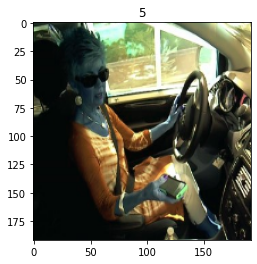

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_69053.jpg
(240, 320, 3)
(192, 192, 3)
Class:  5


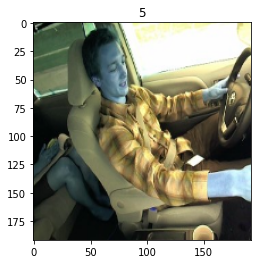

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_81206.jpg
(240, 320, 3)
(192, 192, 3)
Class:  6


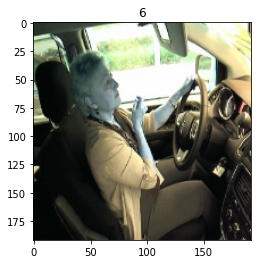

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_66375.jpg
(240, 320, 3)
(192, 192, 3)
Class:  9


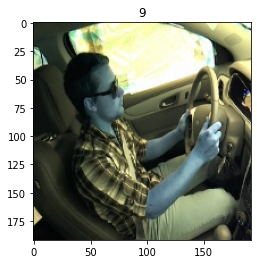

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_66812.jpg
(240, 320, 3)
(192, 192, 3)
Class:  0


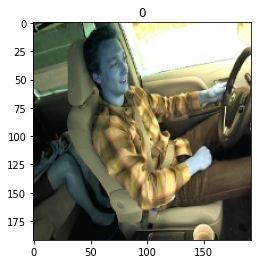

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_78240.jpg
(240, 320, 3)
(192, 192, 3)
Class:  4


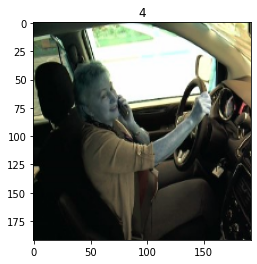

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_75830.jpg
(240, 320, 3)
(192, 192, 3)
Class:  1


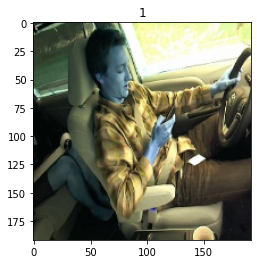

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_72476.jpg
(240, 320, 3)
(192, 192, 3)
Class:  2


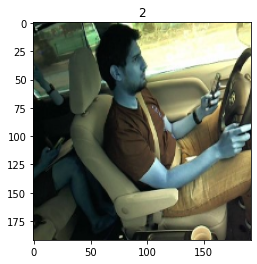

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_70290.jpg
(240, 320, 3)
(192, 192, 3)
Class:  6


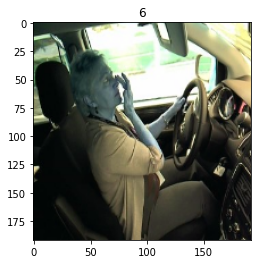

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_74900.jpg
(240, 320, 3)
(192, 192, 3)
Class:  9


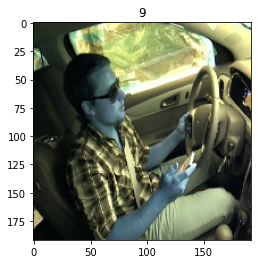

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_68087.jpg
(240, 320, 3)
(192, 192, 3)
Class:  2


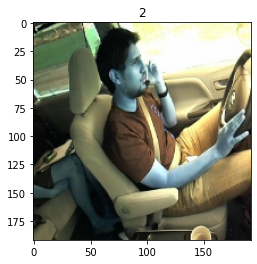

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_78068.jpg
(240, 320, 3)
(192, 192, 3)
Class:  3


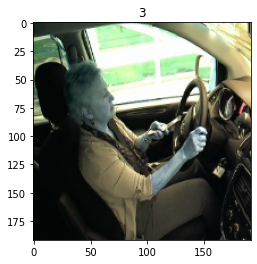

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_6678.jpg
(240, 320, 3)
(192, 192, 3)
Class:  5


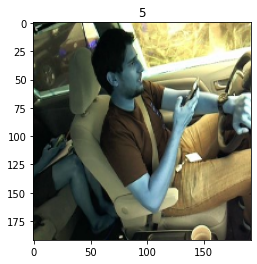

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_72446.jpg
(240, 320, 3)
(192, 192, 3)
Class:  3


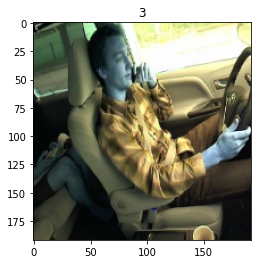

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_69722.jpg
(240, 320, 3)
(192, 192, 3)
Class:  4


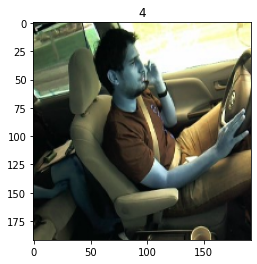

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_81214.jpg
(240, 320, 3)
(192, 192, 3)
Class:  4


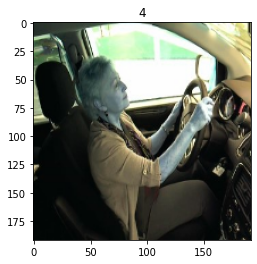

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_67820.jpg
(240, 320, 3)
(192, 192, 3)
Class:  8


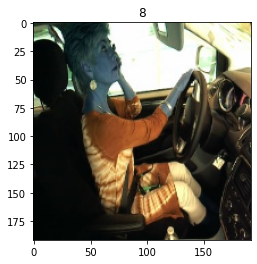

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_77290.jpg
(240, 320, 3)
(192, 192, 3)
Class:  1


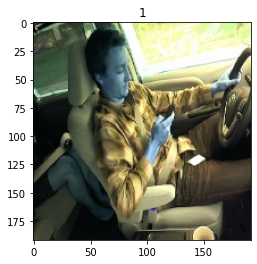

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_66956.jpg
(240, 320, 3)
(192, 192, 3)
Class:  4


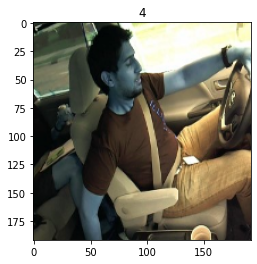

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_75950.jpg
(240, 320, 3)
(192, 192, 3)
Class:  4


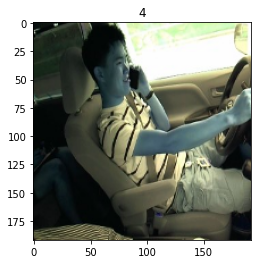

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_73517.jpg
(240, 320, 3)
(192, 192, 3)
Class:  9


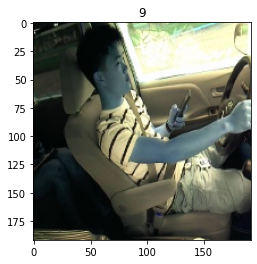

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_8078.jpg
(240, 320, 3)
(192, 192, 3)
Class:  4


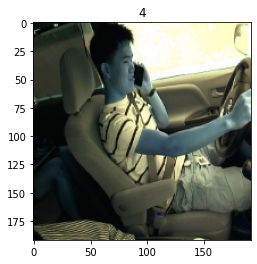

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_70122.jpg
(240, 320, 3)
(192, 192, 3)
Class:  3


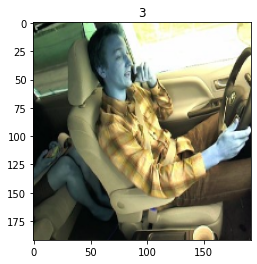

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_69034.jpg
(240, 320, 3)
(192, 192, 3)
Class:  7


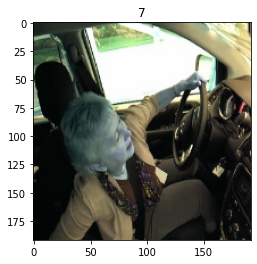

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_70684.jpg
(240, 320, 3)
(192, 192, 3)
Class:  5


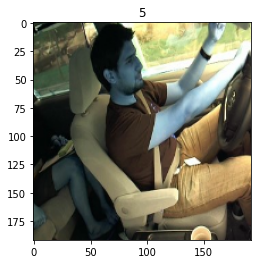

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_82718.jpg
(240, 320, 3)
(192, 192, 3)
Class:  4


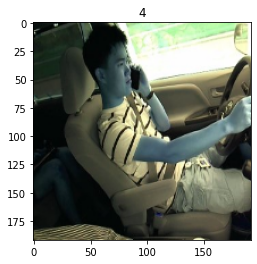

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_80258.jpg
(240, 320, 3)
(192, 192, 3)
Class:  1


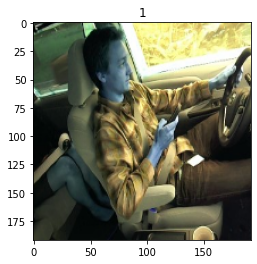

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_70946.jpg
(240, 320, 3)
(192, 192, 3)
Class:  6


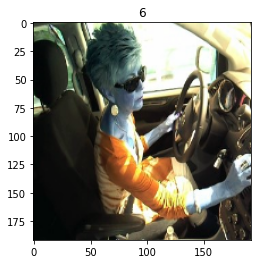

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_78787.jpg
(240, 320, 3)
(192, 192, 3)
Class:  0


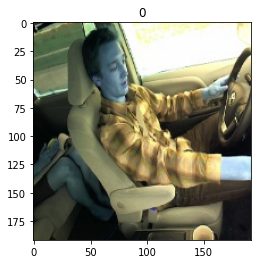

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_803.jpg
(240, 320, 3)
(192, 192, 3)
Class:  4


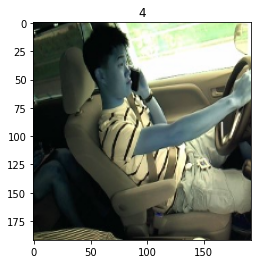

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_80529.jpg
(240, 320, 3)
(192, 192, 3)
Class:  3


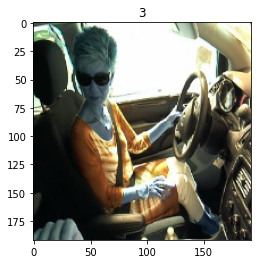

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_76568.jpg
(240, 320, 3)
(192, 192, 3)
Class:  3


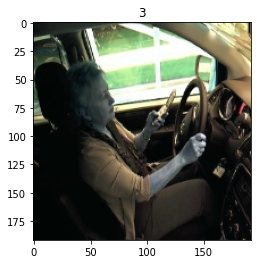

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_78034.jpg
(240, 320, 3)
(192, 192, 3)
Class:  8


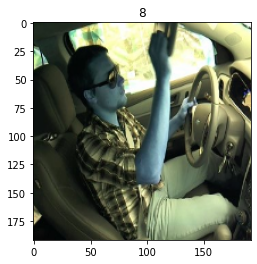

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_69088.jpg
(240, 320, 3)
(192, 192, 3)
Class:  3


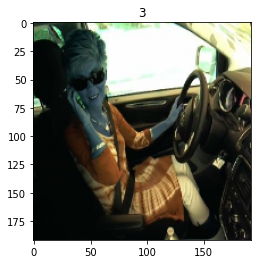

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_81207.jpg
(240, 320, 3)
(192, 192, 3)
Class:  8


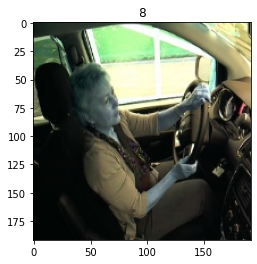

/content/drive/MyDrive/Drunk_distraction /imgs/test/img_66864.jpg
(240, 320, 3)
(192, 192, 3)
Class:  0


In [ ]:
# print(history.history.keys())
import os, cv2
from matplotlib import pyplot as plt
import numpy as np
classes=["c0","c1","c2","c3","c4","c5","c6","c7","c8","c9"]
test_data_dir='/content/drive/MyDrive/Drunk_distraction /imgs/test/'
l= os.listdir(test_data_dir)
batch_size=48
for i in range(len(l)):
  path=test_data_dir+l[i]
  print(path)
  img=cv2.imread(path)
  print(np.shape(img))
  dim = (192, 192)
  img=cv2.resize(img, dim)
  print(np.shape(img))
  img=np.reshape(img,(-1,192,192,3))
  img_class = model.predict(img)
  img_class=np.argmax(img_class, axis=1)
  prediction = img_class[0]
  classname = img_class[0]
  img=np.reshape(img,(192,192,3))
  print("Class: ",classname)
  plt.title(classname)
  plt.imshow(img)
  plt.show()
  i=i+10

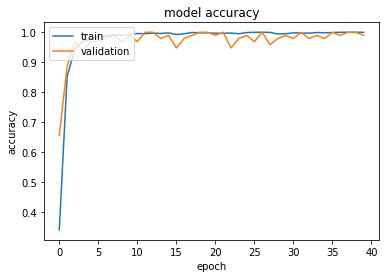

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

Text(0.5, 1.0, 'Loss Curves')

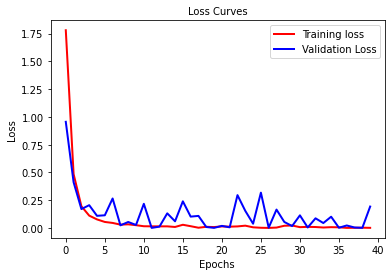

In [ ]:
#plt.figure(figsize=[10,8])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=10)
#plt.grid()
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=10)